# Blatt 5

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


## Aufgabe 1a)

In [47]:
data_file = Path("rawdata_luftqualitaet.csv")
df = pd.read_csv(data_file)

feature_cols = [
    "humidity_inside",
    "temperature_inside",
    "co2_inside",
    "temperature_heater",
    "temperature_wall_inside",
]
target_col = "state_air_quality"
pretty_labels = {col: col.replace("_", " ") for col in feature_cols + [target_col]}

df.head()


,humidity_inside,temperature_inside,co2_inside,temperature_heater,temperature_wall_inside,state_air_quality
0,58.94,21.955,1653,41.187,14.062,1
1,58.97,21.940,1665,40.937,14.062,1
2,57.89,22.353,1707,40.375,14.250,1
3,58.96,22.504,1981,40.875,14.375,1
4,57.74,22.515,1868,40.812,14.375,1


In [48]:
basic_stats = df.describe().loc[["count", "mean", "std", "min", "max"]].T

print(basic_stats)
print("")
print("Anzahl Messwerte je Luftqualitaetsklasse:")
print(df[target_col].value_counts().sort_index())


                         count         mean         std      min       max
humidity_inside          916.0    51.598799    6.706102   34.120    75.510
temperature_inside       916.0    22.103834    1.457741   17.194    27.613
co2_inside               916.0  1381.217249  588.854522  395.000  5544.000
temperature_heater       916.0    40.034884    7.383326   16.687    52.625
temperature_wall_inside  916.0    12.482422    1.421408    8.812    15.750
state_air_quality        916.0     1.085153    0.422532    0.000     2.000

Anzahl Messwerte je Luftqualitaetsklasse:
state_air_quality
0     46
1    746
2    124
Name: count, dtype: int64


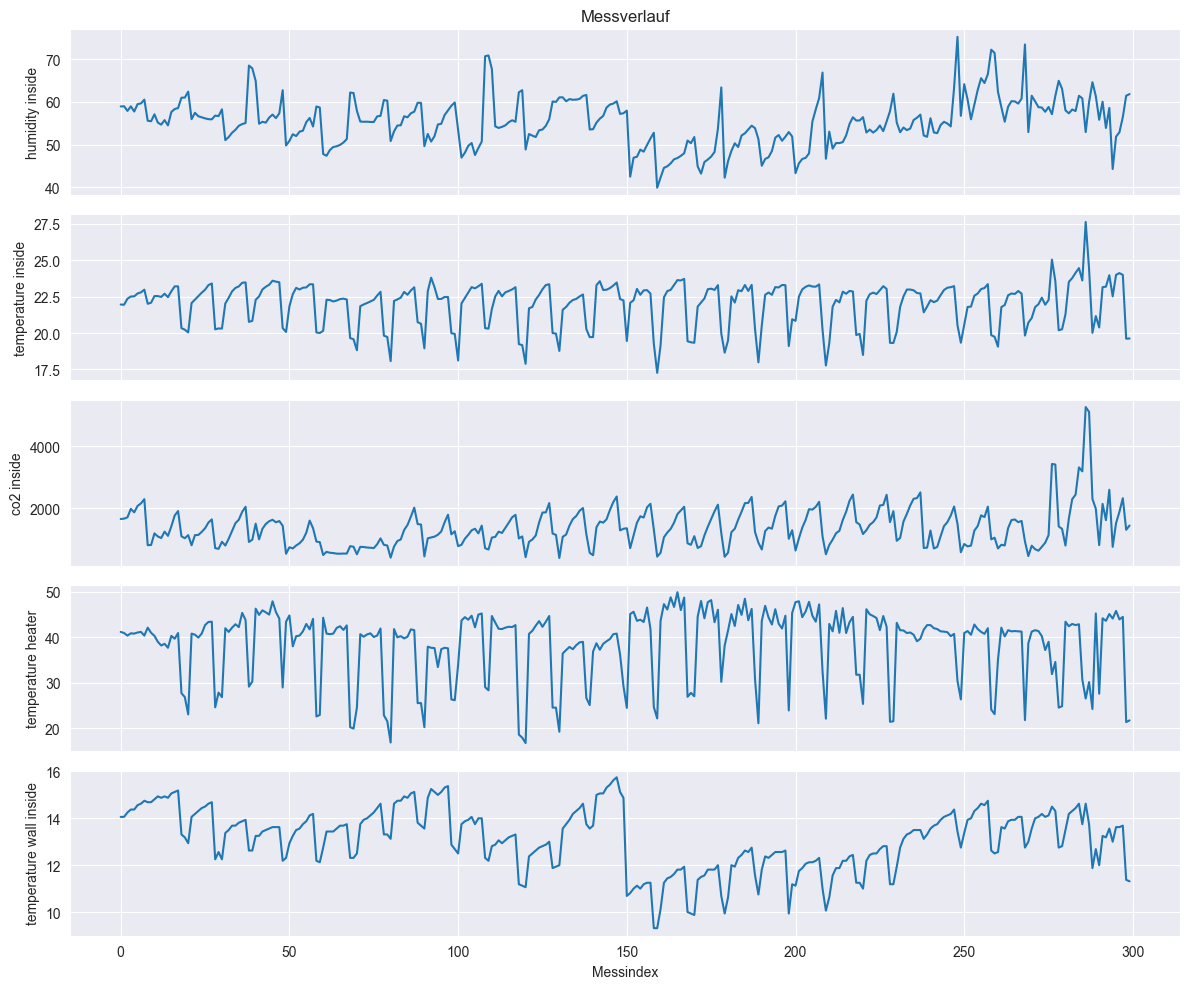

In [66]:
fig, axes = plt.subplots(len(feature_cols), 1, figsize=(12, 10), sharex=True)
subset = df.iloc[:300]
for ax, col in zip(axes, feature_cols):
    ax.plot(subset[col])
    ax.set_ylabel(pretty_labels[col])
axes[0].set_title("Messverlauf")
axes[-1].set_xlabel("Messindex")
plt.tight_layout()


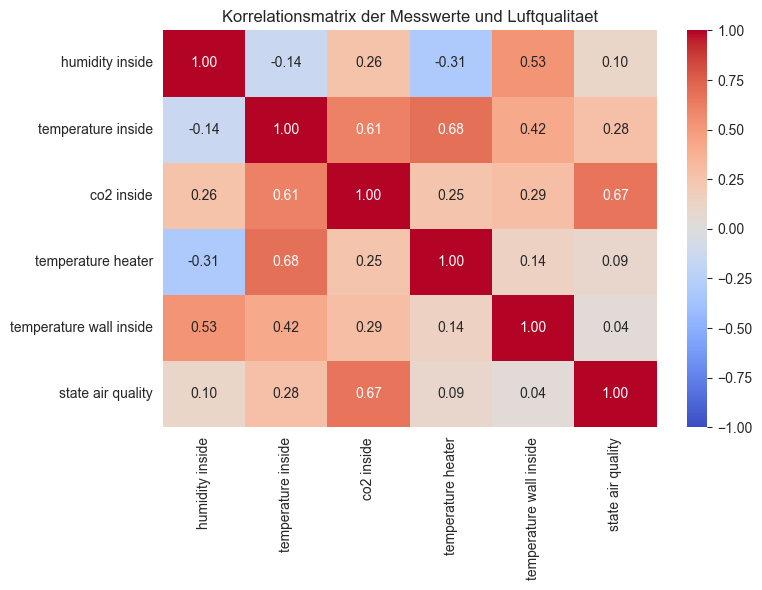

In [68]:
corr = df[feature_cols + [target_col]].corr()
corr_pretty = corr.rename(index=pretty_labels, columns=pretty_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_pretty, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korrelationsmatrix der Messwerte und Luftqualitaet")
plt.tight_layout()


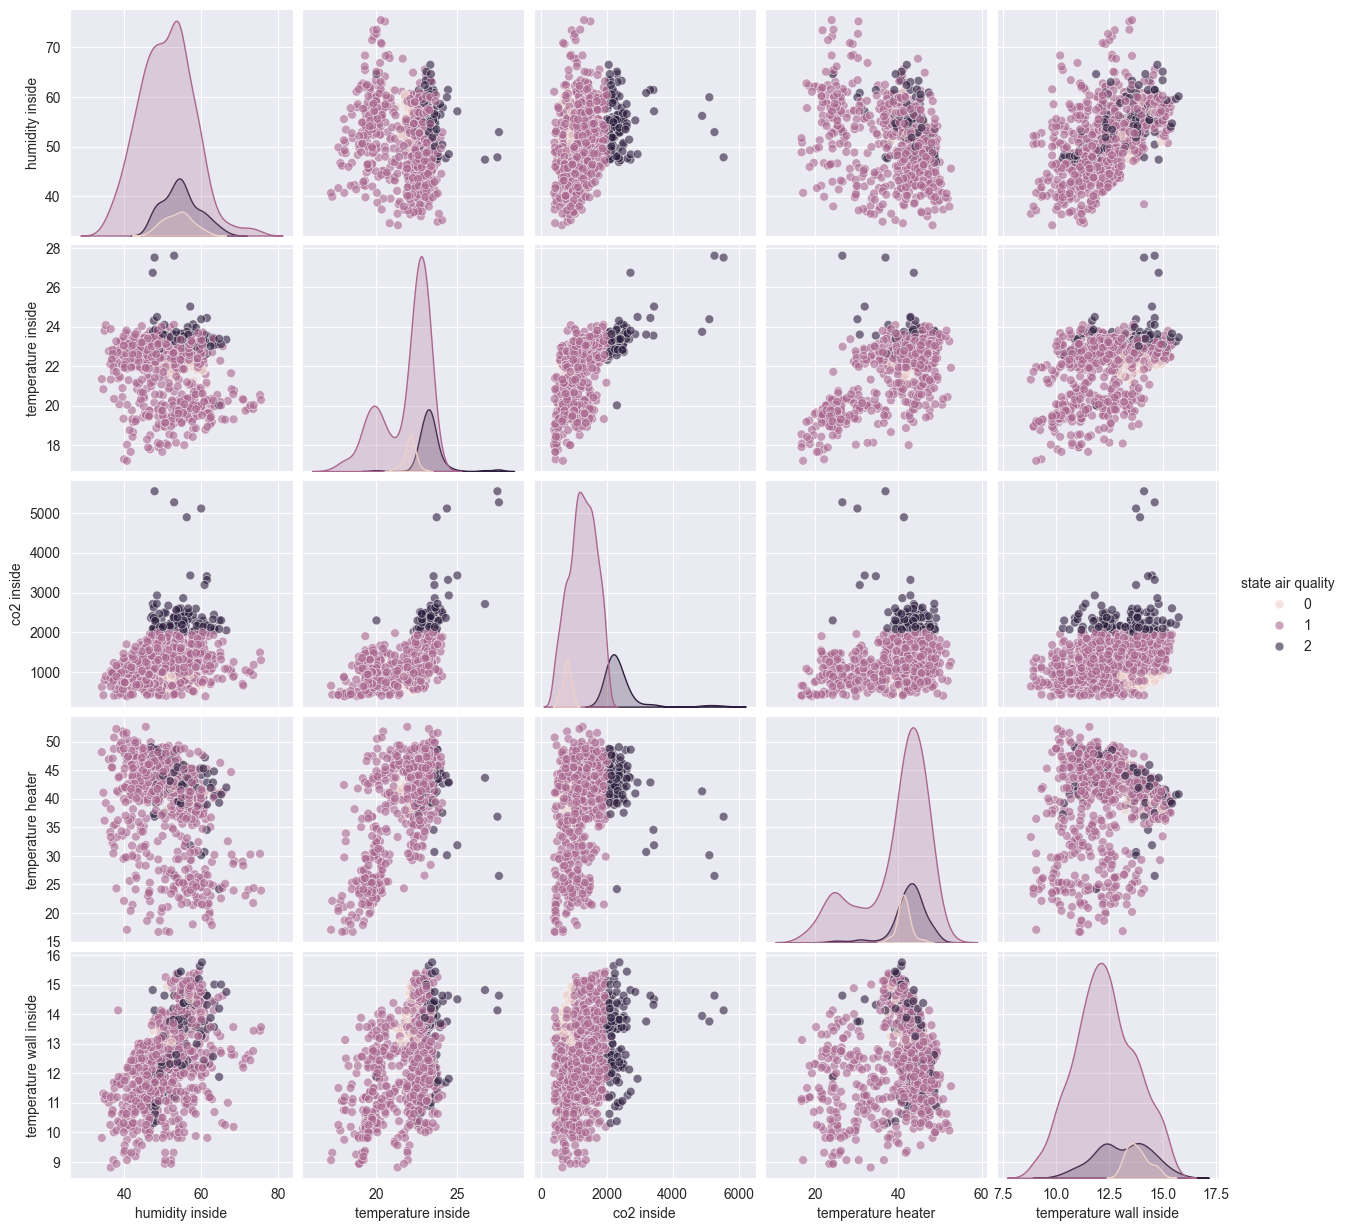

In [61]:
plot_df = df.rename(columns=pretty_labels)
sns.pairplot(
    plot_df,
    vars=[pretty_labels[c] for c in feature_cols],
    hue=pretty_labels[target_col],
    plot_kws={"alpha": 0.6, "s": 40},
)


## Aufgabe 1b)

In [62]:
X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Trainingsdaten: {X_train.shape[0]} Zeilen")
print(f"Testdaten: {X_test.shape[0]} Zeilen")
print(f"Verteilung Training: {y_train.value_counts(normalize=True).sort_index()}")
print(f"Verteilung Test: {y_test.value_counts(normalize=True).sort_index()}")

print(f"Verteilung Gesamtset: {df[target_col].value_counts(normalize=True).sort_index()}")


Trainingsdaten: 732 Zeilen
Testdaten: 184 Zeilen
Verteilung Training: state_air_quality
0    0.050546
1    0.814208
2    0.135246
Name: proportion, dtype: float64
Verteilung Test: state_air_quality
0    0.048913
1    0.815217
2    0.135870
Name: proportion, dtype: float64
Verteilung Gesamtset: state_air_quality
0    0.050218
1    0.814410
2    0.135371
Name: proportion, dtype: float64


## Aufgabe 1c)

In [53]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaled_train_df = pd.DataFrame(X_train_scaled, columns=feature_cols)

scaled_train_df.head()


,humidity_inside,temperature_inside,co2_inside,temperature_heater,temperature_wall_inside
0,0.560763,0.549573,0.259079,0.697396,0.900836
1,0.459048,0.568577,0.266460,0.733903,0.504468
2,0.418459,0.558403,0.225869,0.718265,0.540502
3,0.431747,0.566465,0.078073,0.655657,0.675699
4,0.349360,0.487379,0.042533,0.695642,0.585615


In [70]:
scaled_summary = scaled_train_df.describe().loc[["min", "max", "mean", "std"]]
scaled_summary


,humidity_inside,temperature_inside,co2_inside,temperature_heater,temperature_wall_inside
min,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000
mean,0.422736,0.473608,0.191985,0.652604,0.534409
std,0.159705,0.139931,0.117404,0.201478,0.204047


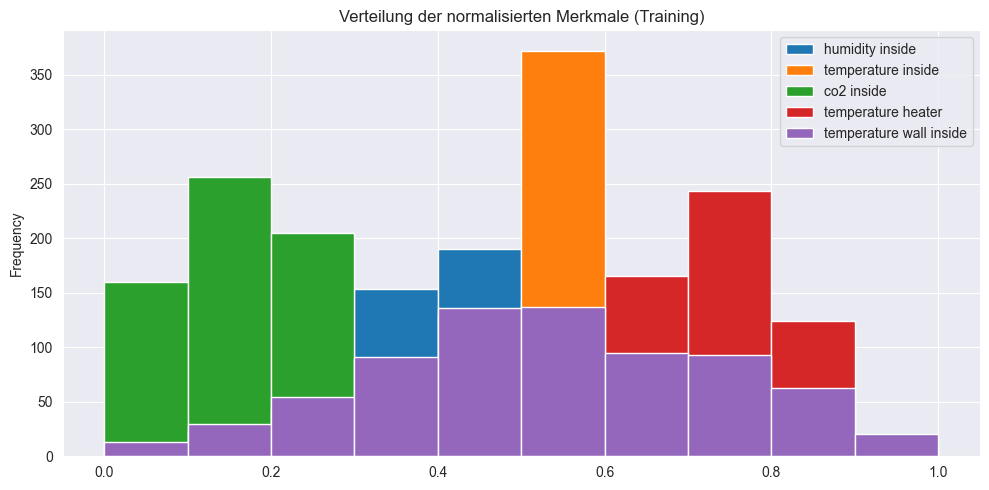

In [77]:
fig, ax = plt.subplots(figsize=(10, 5))
scaled_train_df_pretty = scaled_train_df.rename(columns=pretty_labels)
scaled_train_df_pretty.plot(kind="hist", ax=ax)
ax.set_title("Verteilung der normalisierten Merkmale (Training)")
plt.tight_layout()


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Violinplot zeigt Dichte + Quantile der skalierten Features
sns.violinplot(data=scaled_train_df_pretty, orient="h", ax=axes[0], inner="quartile")
axes[0].set_title("Verteilung der normalisierten Merkmale (Violin)")
# Histogramme uebersichtlich uebereinandergelegt
scaled_train_df_pretty.plot(kind="hist", bins=30, alpha=0.5, ax=axes[1])
axes[1].set_title("Histogramme der normalisierten Merkmale")
plt.tight_layout()


In [56]:
mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=10,
)
mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

pred_df = pd.DataFrame({
    "y_test": y_test.reset_index(drop=True),
    "y_pred": y_pred,
})
pred_df.head(20)


,y_test,y_pred
0,2,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


## Aufgabe 1e)

In [57]:
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy auf dem Testdatensatz: {test_accuracy:.4f}")


Accuracy auf dem Testdatensatz: 0.8152
